### WTI Crude Oil

USO

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start_date = '2014-01-01'
end_date = '2024-03-25'

data = yf.download('USO', start = start_date, end = end_date)

data['Returns'] = data['Adj Close'].pct_change()
data['Cumulative Returns'] = (1 + data['Returns']).cumprod() - 1

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

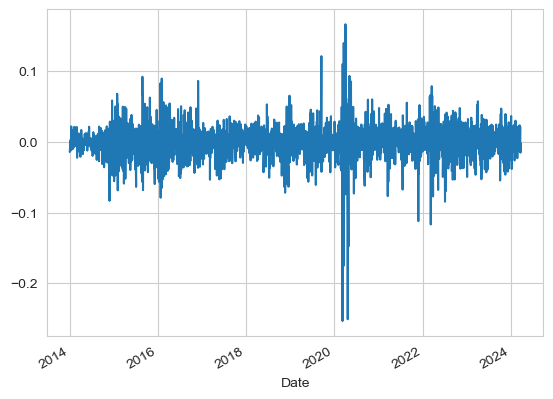

In [3]:
data['Returns'].plot()

In [4]:
days = [i for i in range(3, 62, 2)]
threshold = tuple([-i * 0.01 for i in range(3, 21)])

In [5]:
items = [(i, j) for i in days for j in threshold]

In [6]:
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [8]:
return_data = pd.DataFrame(index = data.index)
for i in range(1, 501) :
    return_data['-' + str(i) + 'days'] = (data['Adj Close'] - data['Adj Close'].shift(i)) / data['Adj Close']
return_data.to_csv('USO_returns_data_adj.csv')
return_data.to_excel('USO_returns_data_adj.xlsx')

In [9]:
return_data.index = range(len(return_data))

In [10]:
return_data

,-1days,-2days,-3days,-4days,-5days,-6days,-7days,-8days,-9days,-10days,...,-491days,-492days,-493days,-494days,-495days,-496days,-497days,-498days,-499days,-500days
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.014222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.005362,-0.019660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000298,-0.005062,-0.019357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.012666,-0.012364,-0.017793,-0.032268,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,0.021159,0.021544,0.037061,0.059374,0.055912,0.059246,0.048089,0.046679,0.058092,0.050911,...,0.048859,0.049500,0.000898,0.023468,0.044242,-0.035394,-0.022698,-0.050910,-0.007438,-0.020005
2569,0.005738,0.026775,0.027158,0.042586,0.064771,0.061329,0.064644,0.053551,0.052148,0.063496,...,0.020018,0.054316,0.054953,0.006630,0.029070,0.049726,-0.029453,-0.016830,-0.044881,-0.001657
2570,-0.015275,-0.009450,0.011909,0.012298,0.027961,0.050485,0.046990,0.050356,0.039094,0.037670,...,0.031715,0.005049,0.039871,0.040518,-0.008544,0.014239,0.035210,-0.045178,-0.032362,-0.060841
2571,-0.005598,-0.020958,-0.015100,0.006379,0.006769,0.022520,0.045171,0.041656,0.045040,0.033715,...,0.049076,0.026295,-0.000521,0.034496,0.035147,-0.014189,0.008722,0.029810,-0.051028,-0.038141


In [11]:
dataframes = dict()
dataframes_plot = dict()

for d, thres in tqdm(items) :
    thres = round(-thres * 100, 1)
    dataframes[f'day{d}_{thres}per'] = pd.DataFrame(index = data.index)
    dataframes_plot[f'day{d}_{thres}per_plot'] = pd.DataFrame(index = data.index)
    for i in range(1, 501) :
        temp = ((1 + data['Cumulative Returns'].iloc[return_data[return_data[str(-i) + 'days'] < -thres * 0.01][:-d].index + d]) / (1 + data['Cumulative Returns'].iloc[return_data[return_data[str(-i) + 'days'] < -thres * 0.01][:-d].index].values)) - 1
        dataframes[f'day{d}_{thres}per'] = pd.concat(
            [dataframes[f'day{d}_{thres}per'], temp], axis = 1
        )
        dataframes_plot[f'day{d}_{thres}per_plot'] = pd.concat(
            [dataframes_plot[f'day{d}_{thres}per_plot'], temp], axis = 0
        )
    dataframes[f'day{d}_{thres}per'].columns = [str(-i) + 'days' for i in range(1, 501)]
    dataframes[f'day{d}_{thres}per'].to_excel(f'./excel/USO_day{d}_{int(thres)}per.xlsx')

100%|██████████| 540/540 [2:09:29<00:00, 14.39s/it]  


In [12]:
def statsplot(index, data, thresh, ticker : str) :
    plt.figure(figsize = (8, 8))
    plt.subplot(2, 2, 1)
    plt.plot(
        index, [i.mean() for i in data],
        marker = '.'
    )
    plt.grid(False)
    #plt.ylim([-0.05, 0.25])
    plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
    plt.title('mean')
    
    plt.subplot(2, 2, 2)
    plt.plot(
        index, [i.std() for i in data],
        marker = '.'
    )
    plt.grid(False)
    #plt.ylim([-0.05, 0.2])
    plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
    plt.title('standard dev')
    
    plt.subplot(2, 2, 3)
    plt.plot(
        index, [i.skew() for i in data],
        marker = '.'
    )
    plt.grid(False)
    #plt.ylim([-1, 1])
    plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
    plt.title('skewness')
    
    plt.subplot(2, 2, 4)
    plt.plot(
        index, [i.kurt() for i in data],
        marker = '.'
    )
    plt.grid(False)
    #plt.ylim([-1, 2.2])
    plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
    plt.title('kurtosis')
    
    plt.tight_layout()
    
    plt.suptitle(f'sim_thresh : {thresh}% | market : {ticker} | start : {start_date} | end : {end_date}')
    plt.tight_layout()
    
    filename = f'./figure/{ticker}_distribution_{thresh}percent.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    return None

def pipeline(threshold, days, dataframes, ticker) :
    values = []

    for i in days :
        values.append(
            dataframes[f"day{i}_{threshold}.0per"].iloc[:,1:].stack().reset_index(drop=True)
        )
    
    statsplot(days, values, threshold, ticker)
    return None

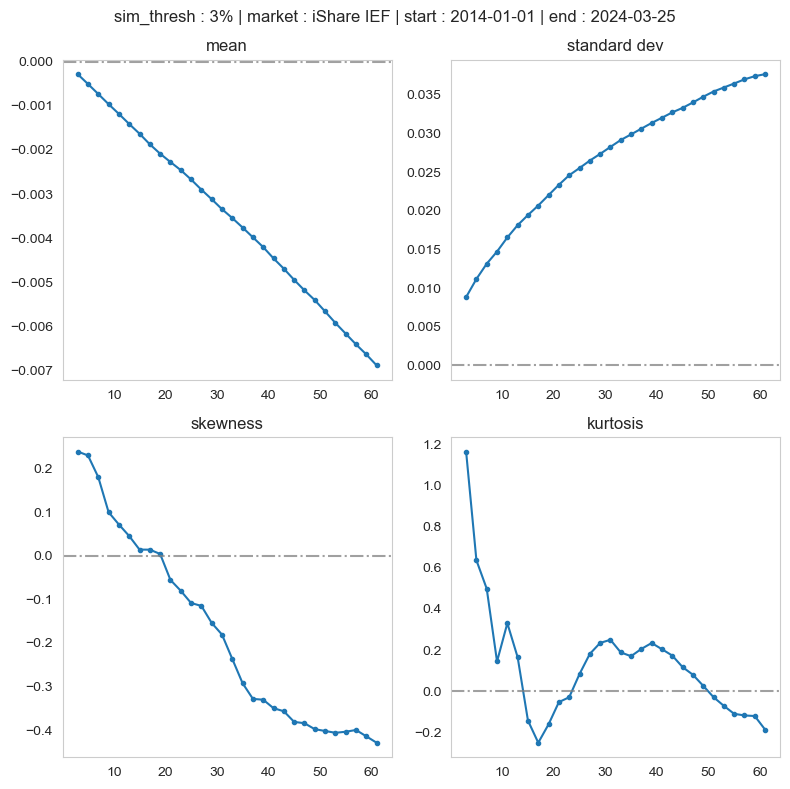

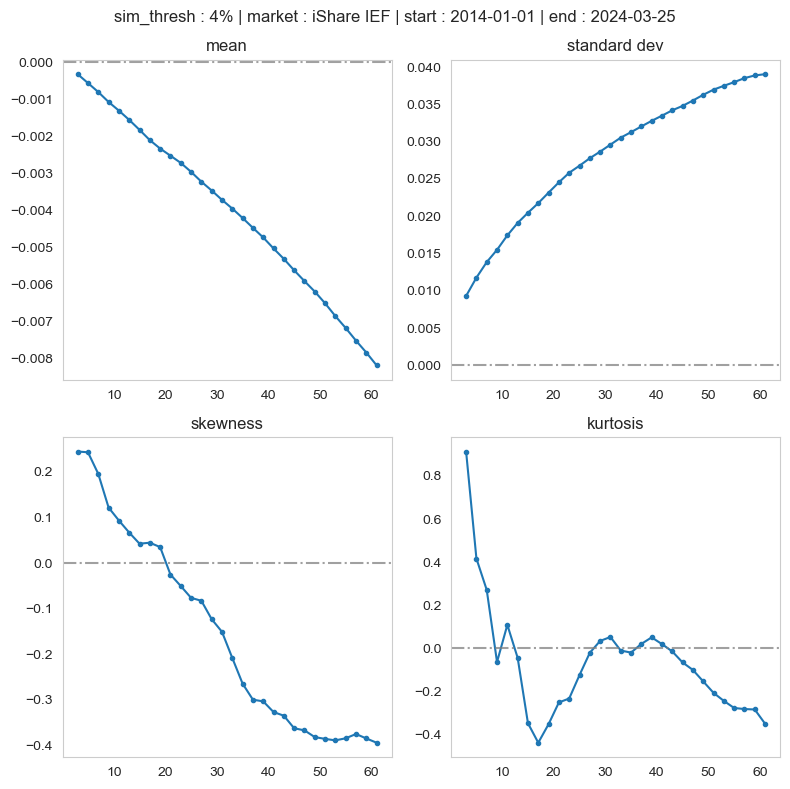

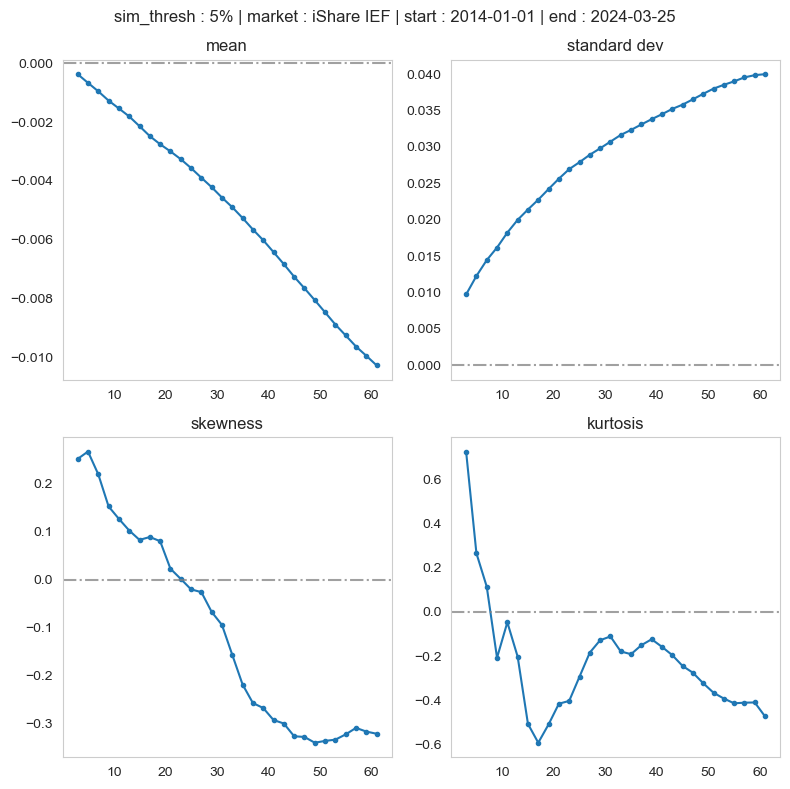

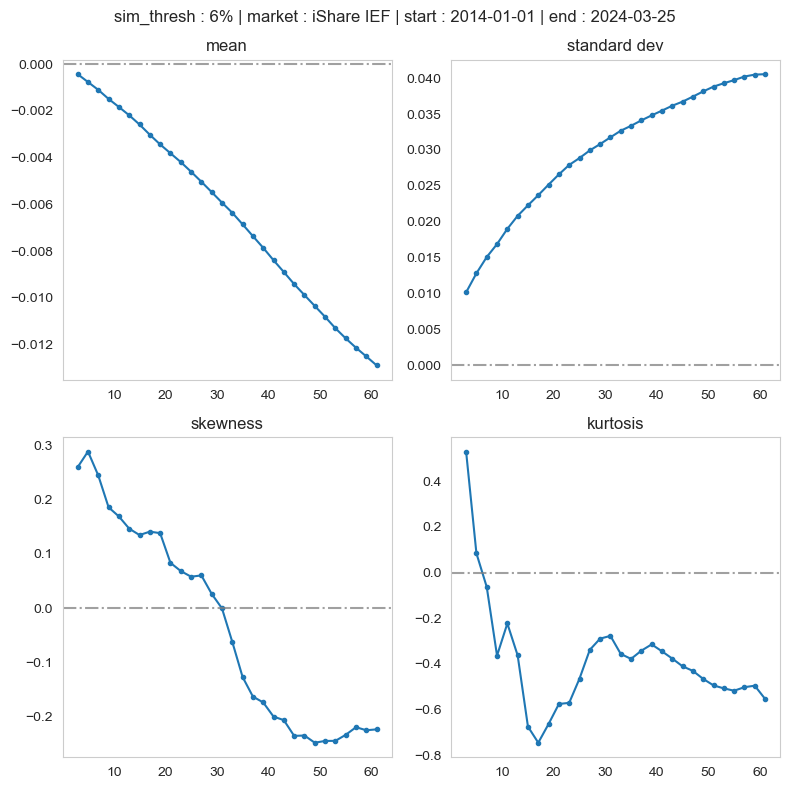

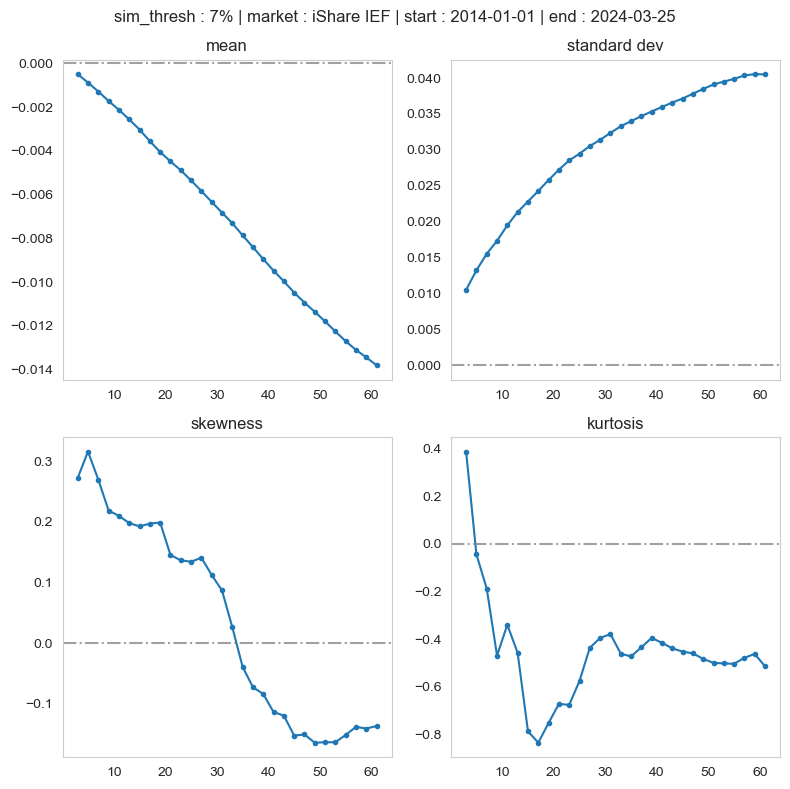

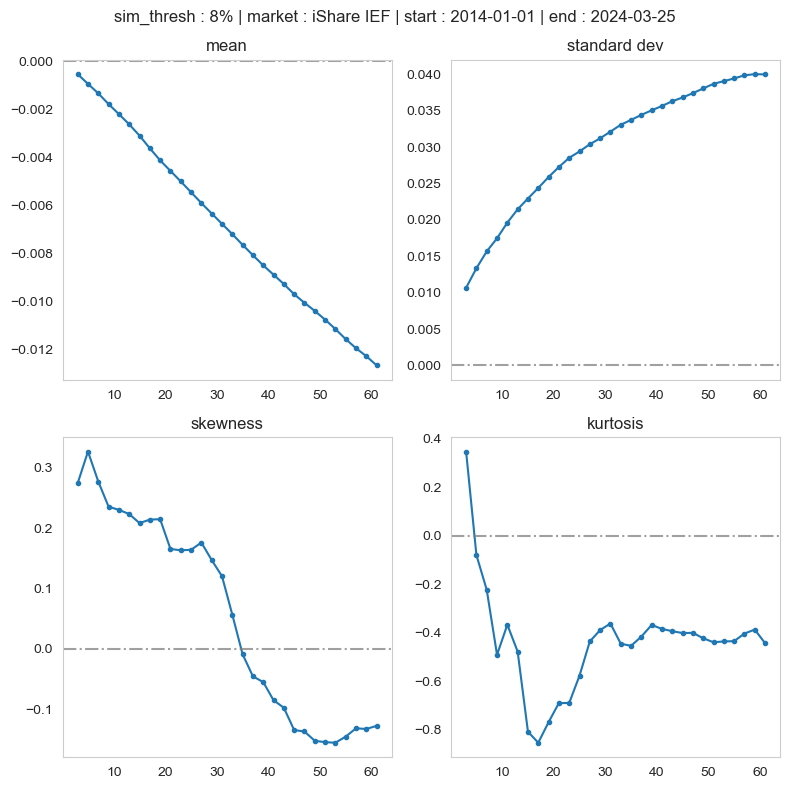

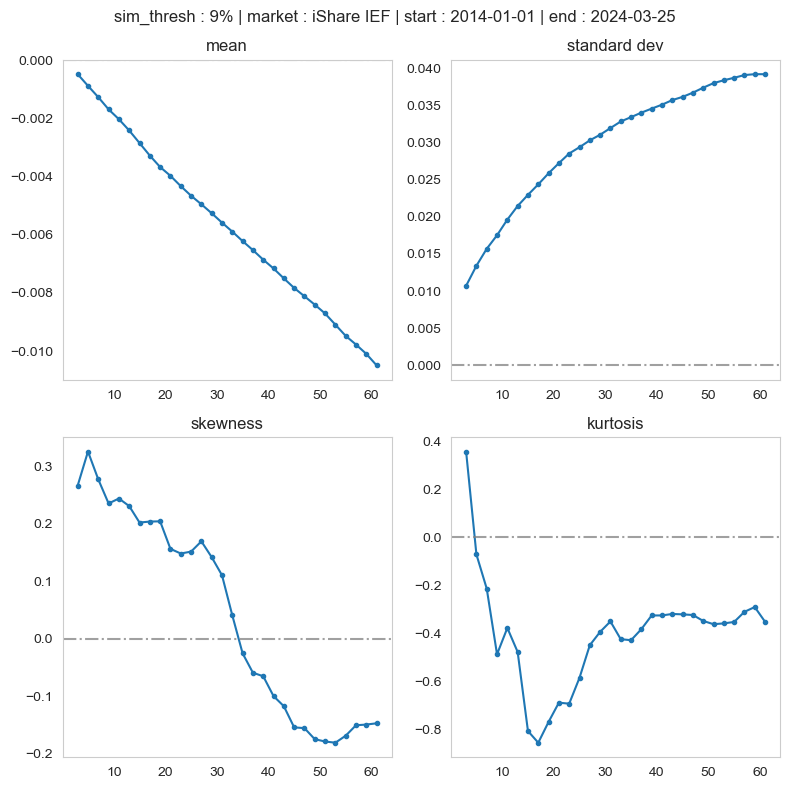

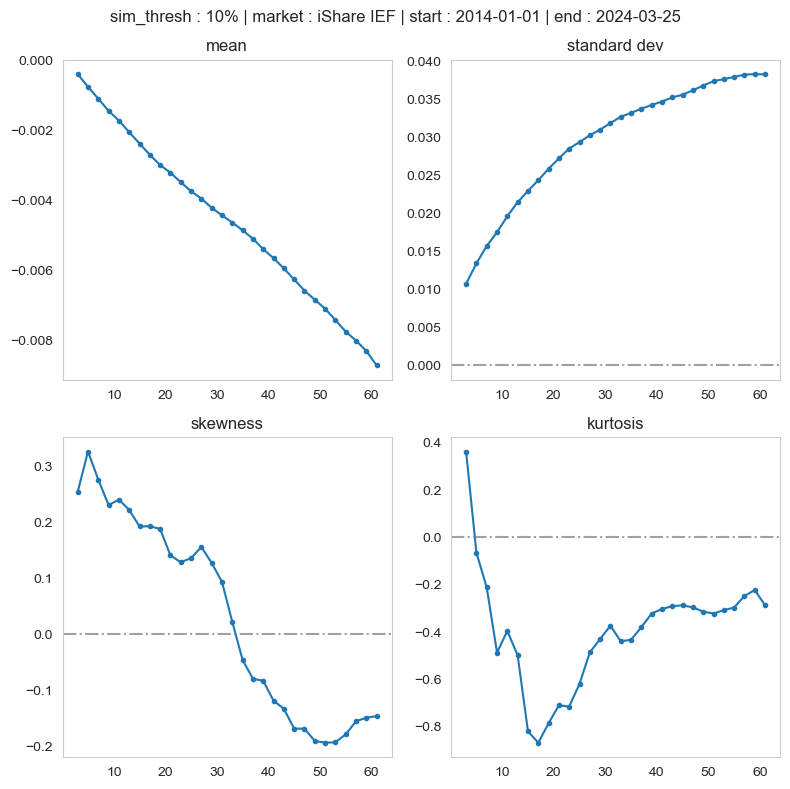

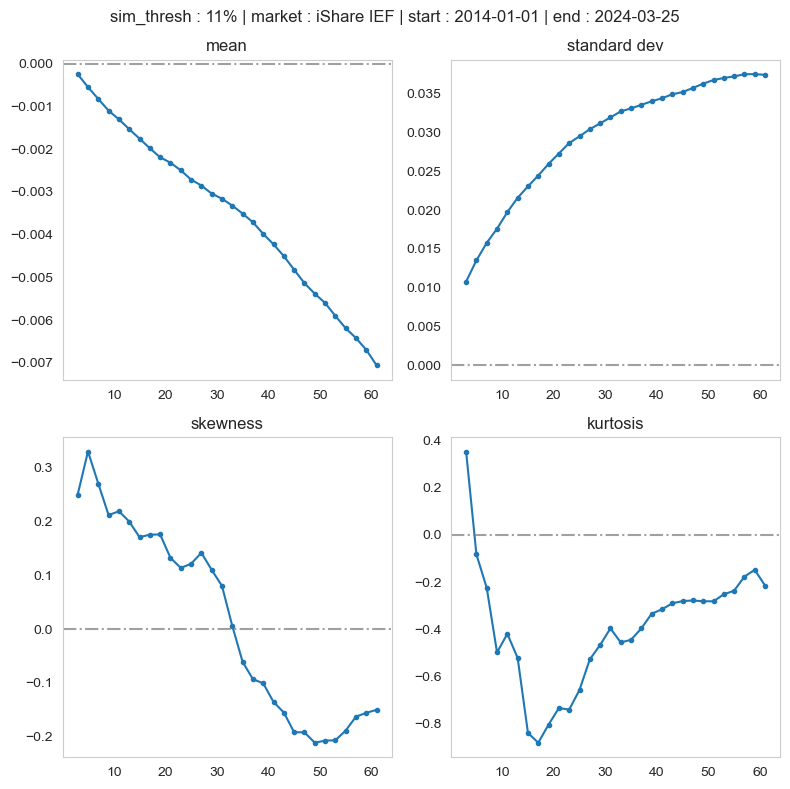

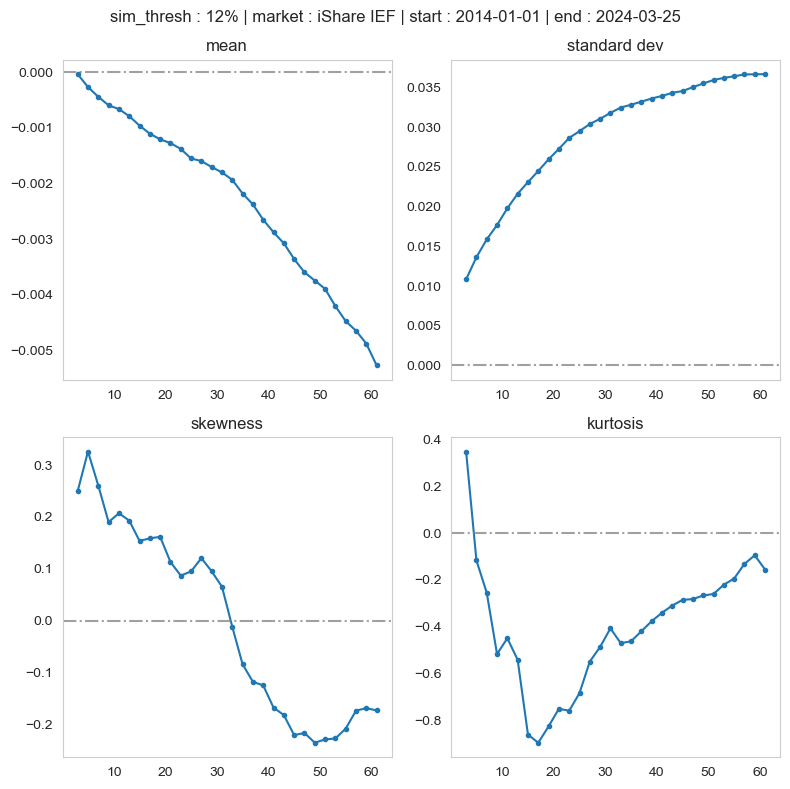

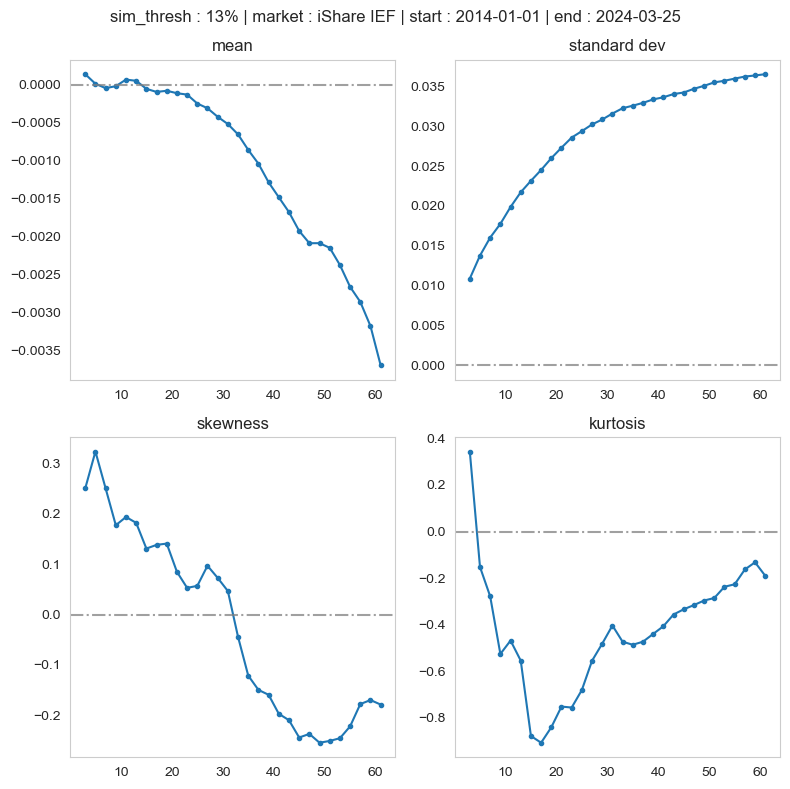

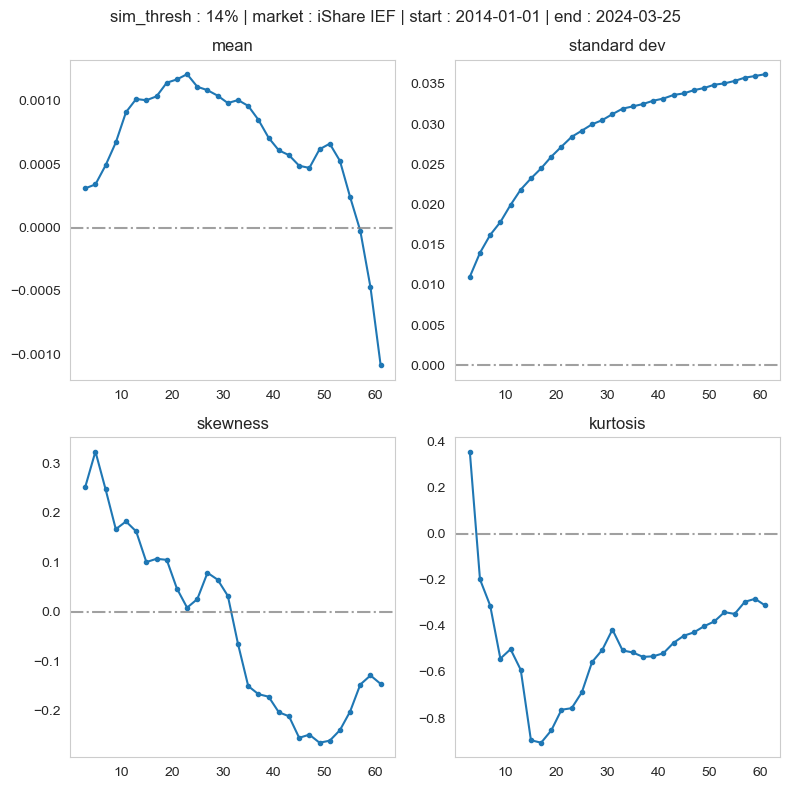

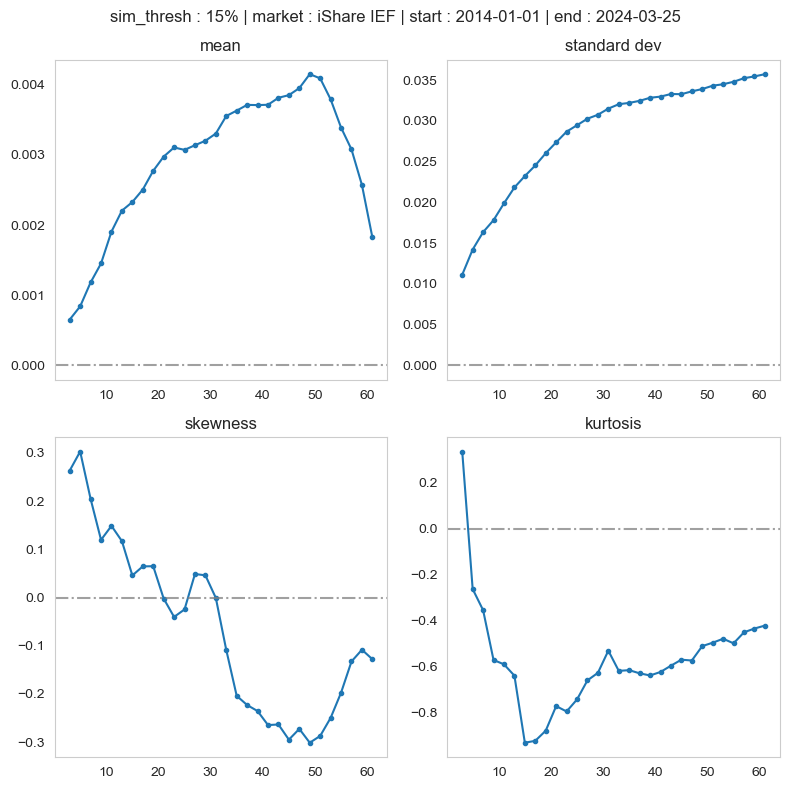

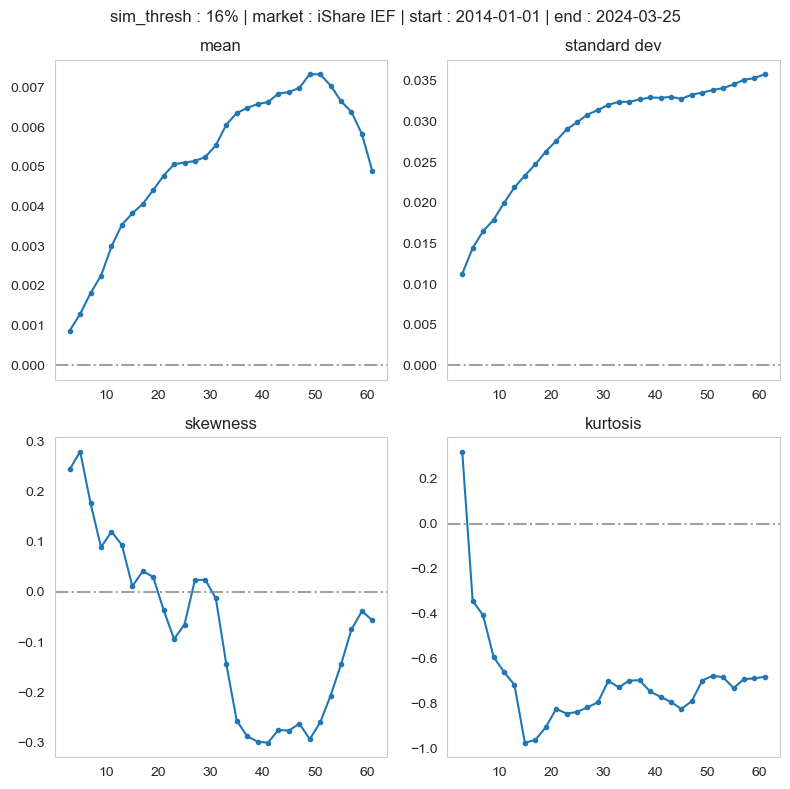

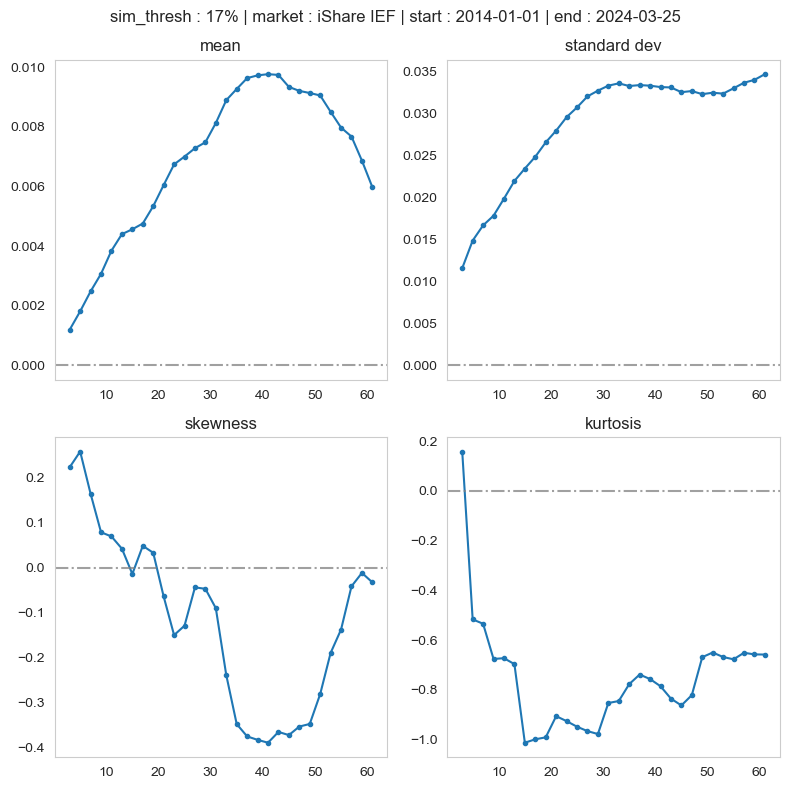

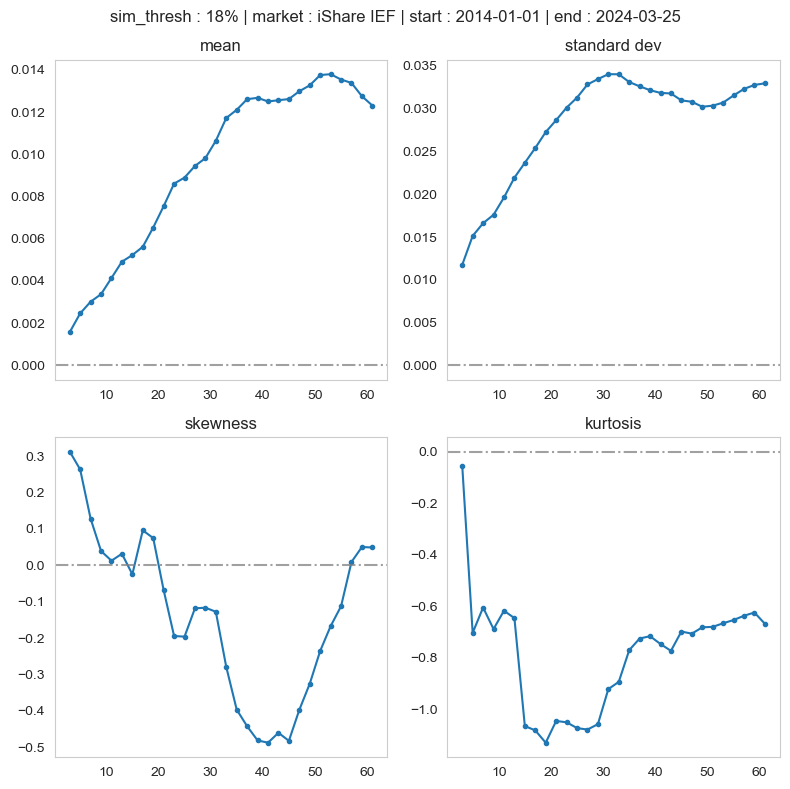

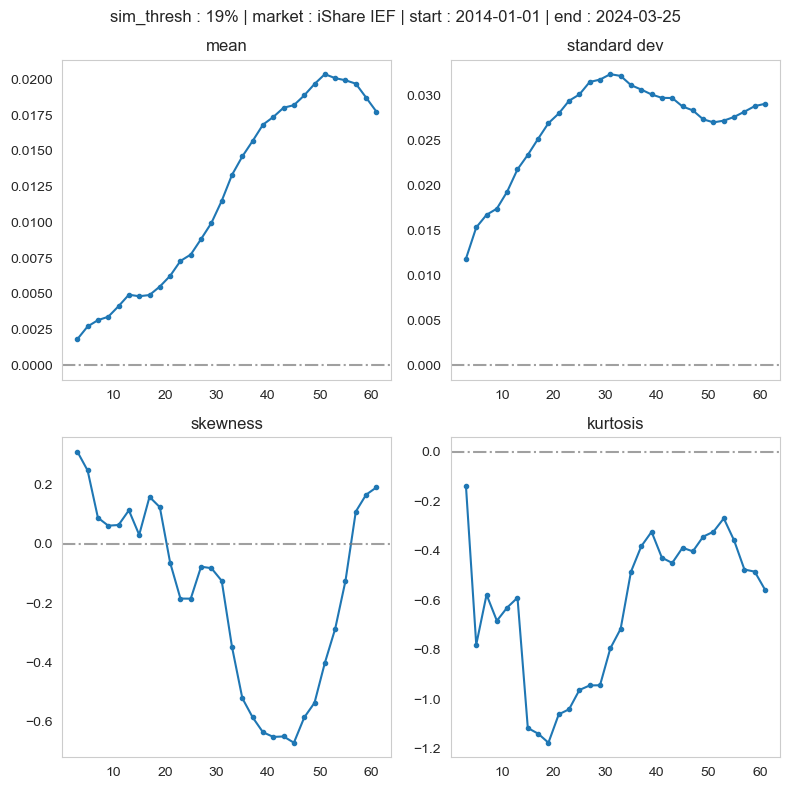

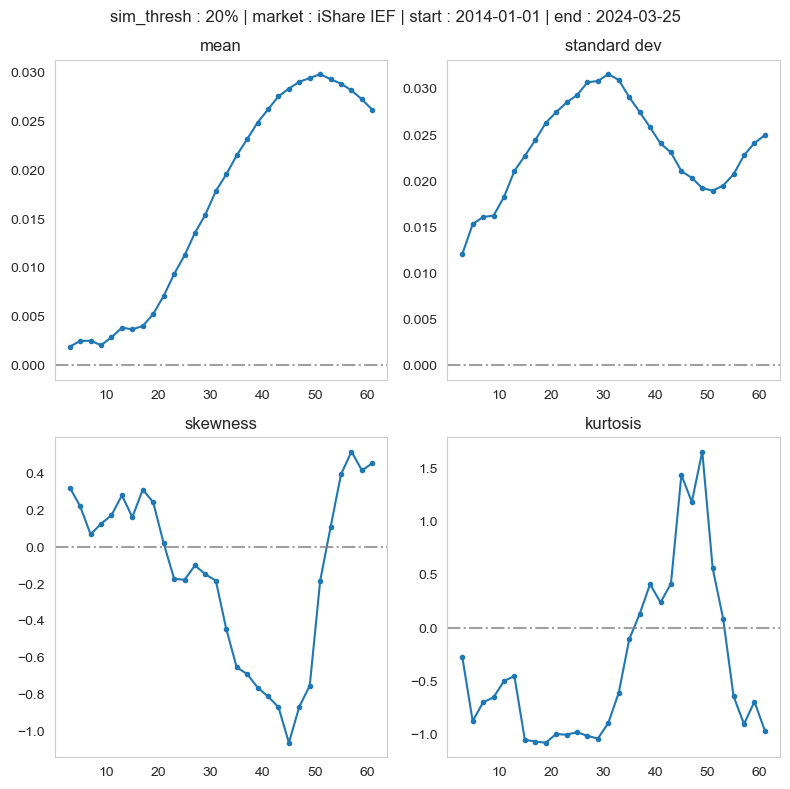

In [14]:
tick = 'iShare IEF'
for i in threshold :
    t = -i * 100
    pipeline(int(t), days, dataframes, tick)